## GRIP - The Sparks Foundation

## Data Science and Business Analytics Intern

## Task 1 : Prediction using Supervised Machine Learning

### Name : Ranit Sen

## AIM - In this task it is required to predict the percentage of an student based on the no. of study hours

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## Data Cleaning and Preperation

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

So there we can see only two types of variable is there .

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

We can see that there is no null value in  the data so we do not need to do anything .

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking Outliers

We will use boxplot to check the presence of outliers.

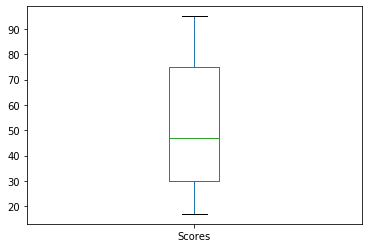

In [7]:
df['Scores'].plot.box()

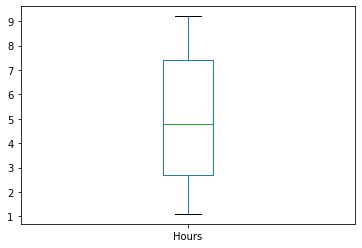

In [8]:
df['Hours'].plot.box()

From the above two diagram it is clear that there is no outliers present in the data.

## Data Analysis and Visualization

Now as we have prepare the data let's analyse the data using graphs.

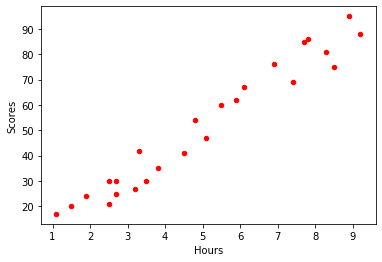

In [9]:
df.plot.scatter('Hours','Scores',color='r')

From the above graph it is clear that there is positive linear relationship between the two variables which can also be confirmed by finding the correlation between the two .

In [10]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Model Building

Here we will divide the data into train and test data and we will perform simple linear regression model for this problem .

In [11]:
x=df.drop('Scores',axis=1)
y=df['Scores']

In [12]:
x.shape

(25, 1)

In [13]:
y.shape

(25,)

In [14]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)

## Training the Model

Here we will fit the data in the linear regression model.

In [15]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualization of the Model

The regression line has equation 𝑏₀ + 𝑏₁𝑥

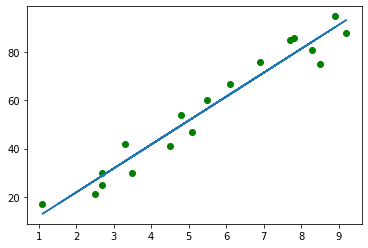

In [16]:
reg_line = lreg.intercept_ + lreg.coef_*x 
plt.scatter(train_x,train_y,color='g')
plt.plot(x, reg_line)
plt.show()

## Prediction

So as we have trained and visualize our model let's make the predictions

In [17]:
pred=lreg.predict(test_x)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [18]:
test_y

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [19]:
data = pd.DataFrame({'Actual Score':np.array(test_y),'Predected Score':pred})
data

,Actual Score,Predected Score
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Now let's make the prediction of how much the student will score if he studies for 9.25 hours

In [20]:
time=9.25
pred_score=lreg.predict([[time]])
pred_score

array([93.89272889])

So we can see that the student will score approx. 93.9 percent marks if he studies for 9.25 hours a day.

## Model Evaluation

We evaluate the model to test that whether we have build the model perfectly or not.

In [21]:
lreg.score(test_x,test_y)

0.9367661043365054

In [22]:
lreg.score(train_x,train_y)

0.9484509249326872

As we can see , the r^2 value of training and the test data are almost equal we can say that our model is quite perfect. Let's find the mean squared error also , less error means our model is well fitted.

In [23]:
from sklearn import metrics
metrics.mean_squared_error(test_y,pred)

20.33292367497997

## Result : For studying 9.25 hours per day a student is likely to score 94 percentage of marks approx. .